
### Data Exploration 


#### Authors - Aishwarya and Manjushree

In [9]:
# Python statements that import the standard libraries

import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as matplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
#read the csv file in a dataframe

df = pd.read_csv("../data/Customer_churn_raw.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38.0,0,4370,71.0,5.0,17.0,1,1,5,197.640,177.8760,69.7640,0
1,O,0,39.0,0,NaN,5.0,7.0,4.0,1,1,6,46.035,41.4315,60.0000,0
2,10,0,37.0,0,2453,60.0,359.0,24.0,1,1,2,1536.520,1382.8680,203.6520,0
3,10,0,38.0,0,4198,66.0,1.0,35.0,1,1,10,240.020,216.0180,74.0020,0
4,3,0,NaN,0,2393,58.0,2.0,33.0,1,1,9,145.805,131.2245,64.5805,0


In [11]:
# Check number of rows and columns

df.shape

(3150, 15)

In [12]:
# To get the datatypes of each columns

df.dtypes

Call  Failure               object
Complains                   object
Subscription  Length       float64
Charge  Amount              object
Seconds of Use              object
Frequency of use           float64
Frequency of SMS           float64
Distinct Called Numbers    float64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
FN                         float64
FP                         float64
Churn                        int64
dtype: object

In [13]:
#Renaming Column names

df=df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "subs_len", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "seconds_of_use", "Frequency of use": "freq_of_use", "Frequency of SMS": "freq_of_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})

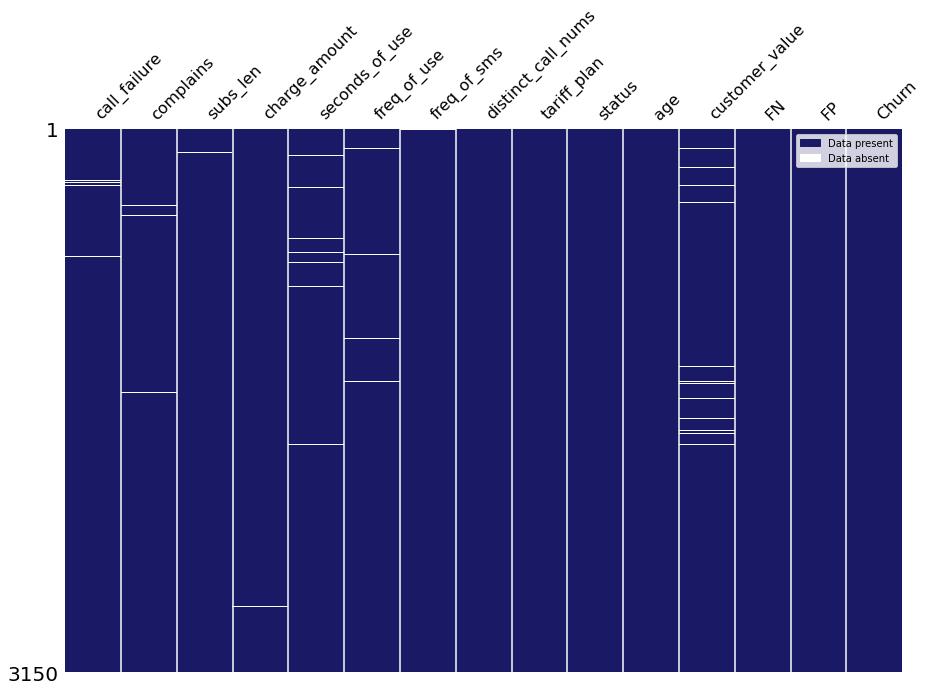

In [14]:
# Checking for missing values

msno.matrix(df,figsize=(15,10), sparkline=False, p=0, color=(0.1, 0.1, 0.4))
gray_patch = mpatches.Patch(color=(0.1, 0.1, 0.4), label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(handles=[gray_patch, white_patch])
# plt.legend(['missing','not missing'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Missing values are showing in many columns with white stripe lines

#### Observation
From the above plot, Columns call_failure, complains, subs_len, charge_amount, seconds_of_use, frequency_of_use and customer_value columns have missing values which need to be cleaned

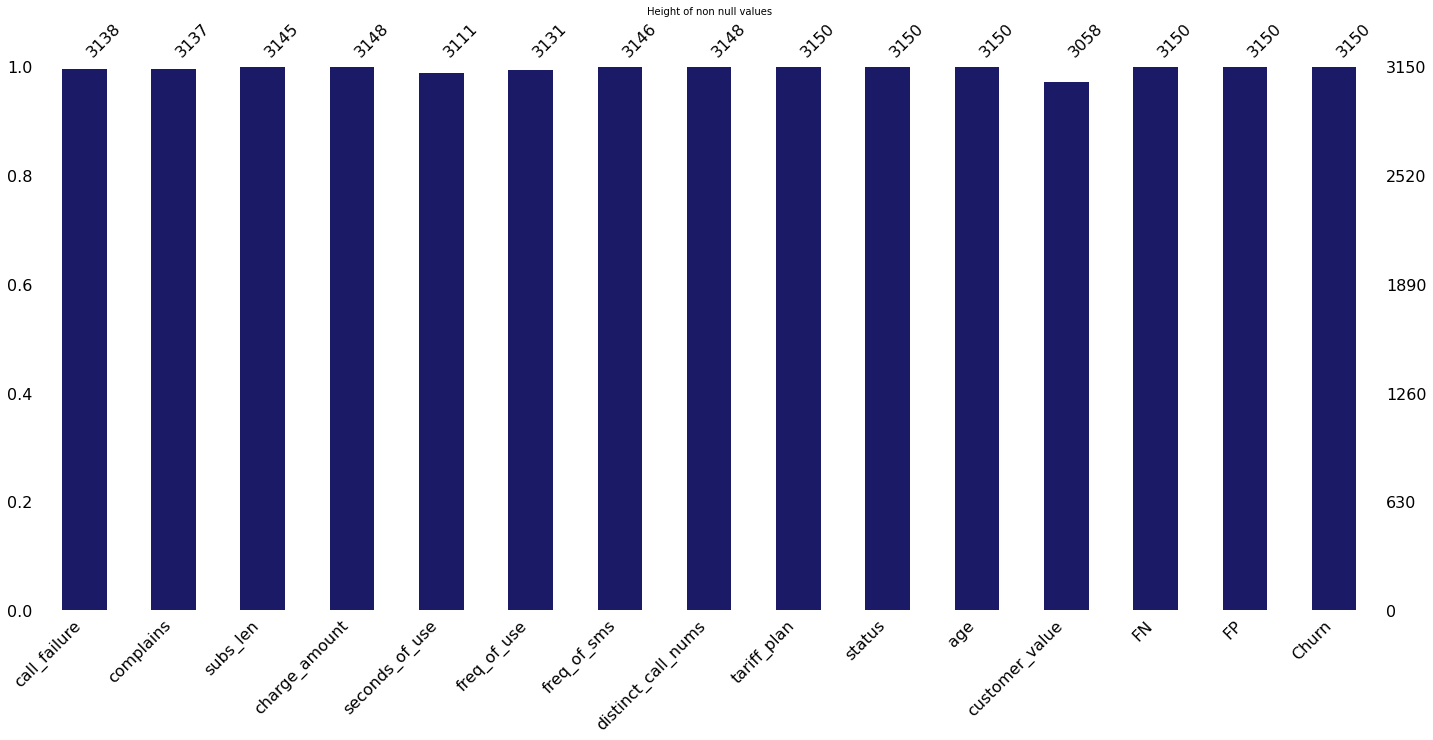

In [15]:
# check for null values

msno.bar(df,color=(0.1, 0.1, 0.4))
plt.title('Height of non null values', fontsize = 10)
plt.show()

msno.bar is a simple visualization of nullity by column,

##### Observations

From the above plot, Customer_value column has the most number of null values as the height if that bar is small comapred to the remaining bar plots

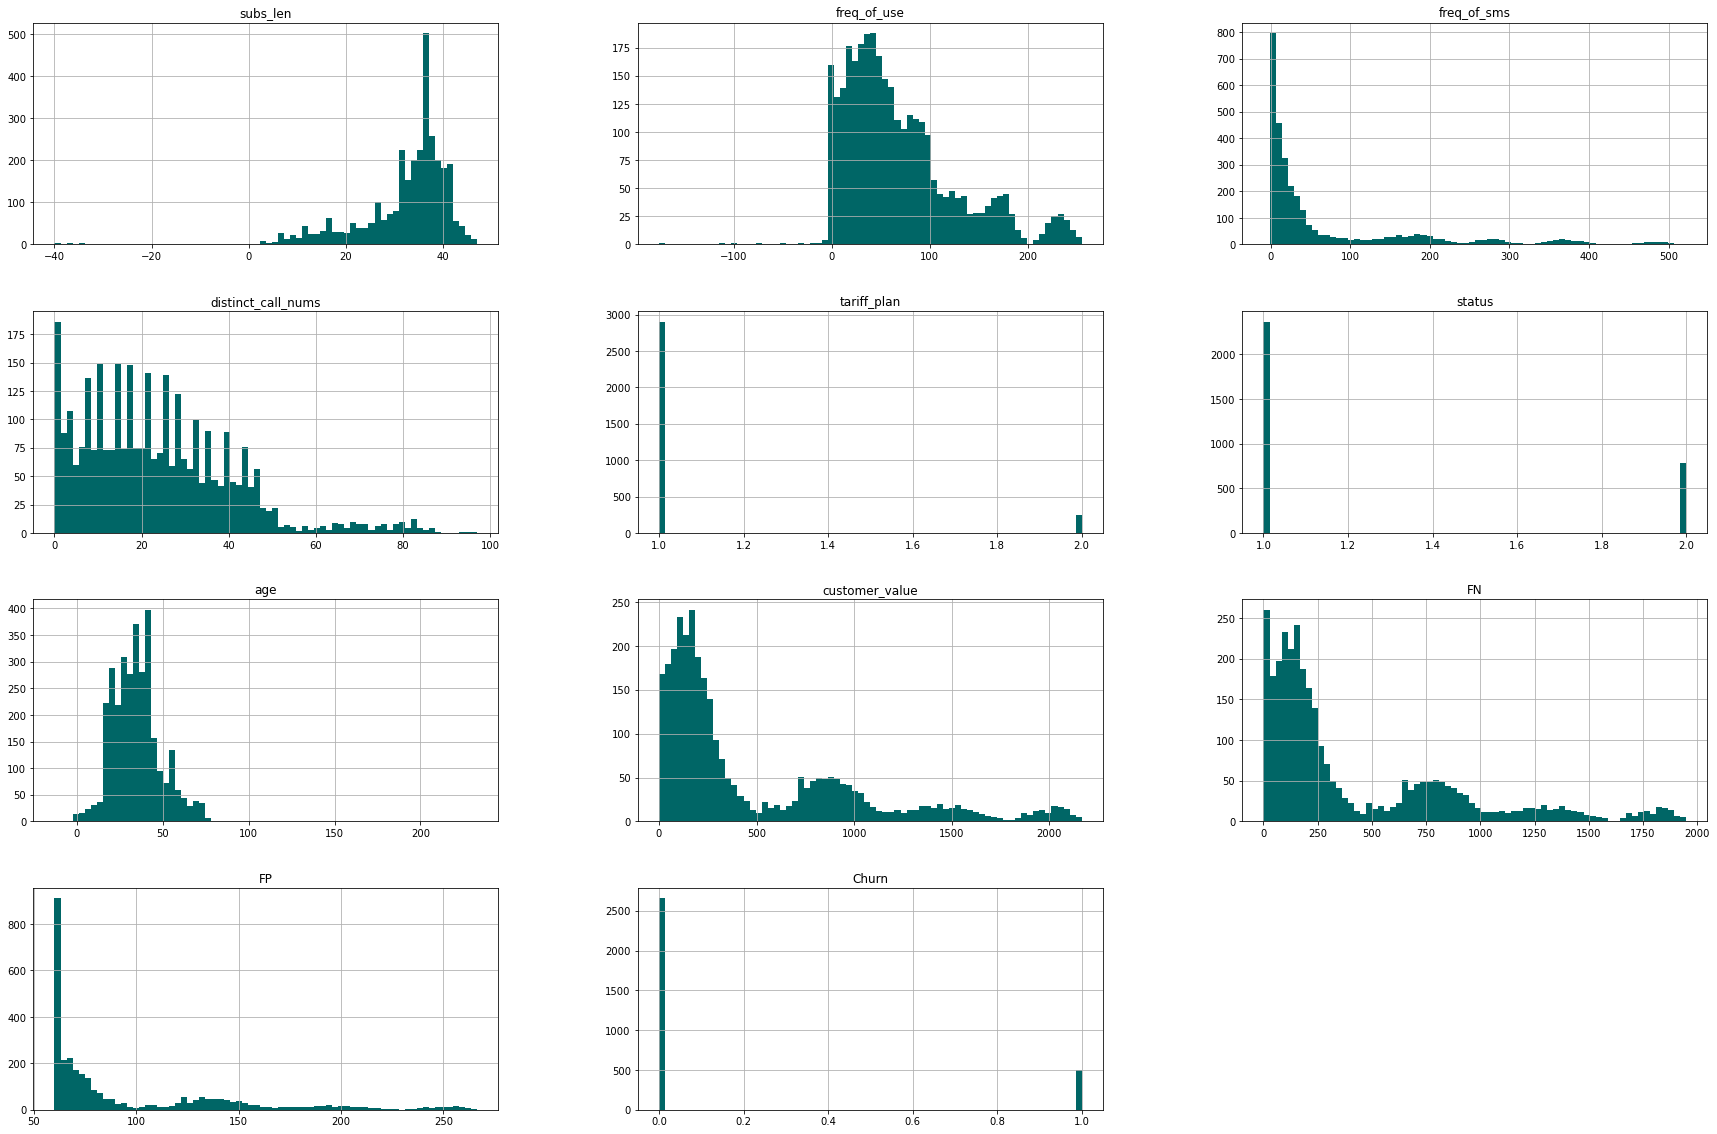

In [16]:
# Frequency distribution of all the columns

df.hist(bins=70,figsize=(30,20),color=(0,0.4,0.4))
plt.show()

#### Observation: 
 Frequency distributio of the the columns are shown above

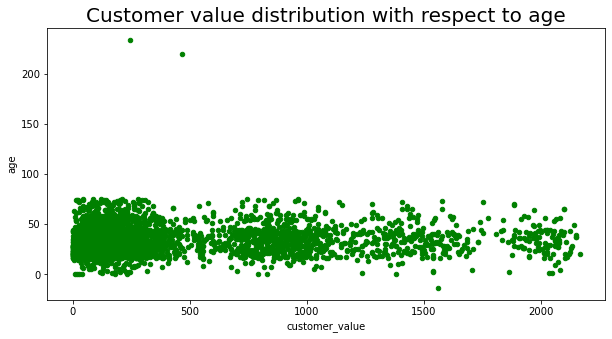

In [17]:
# checking how subscription length changing the churn value

df[['customer_value','age']].plot(kind='scatter',x= 'customer_value',y= 'age', figsize=(10,5),color="green")
plt.title("Customer value distribution with respect to age",fontsize = 20)
plt.show()

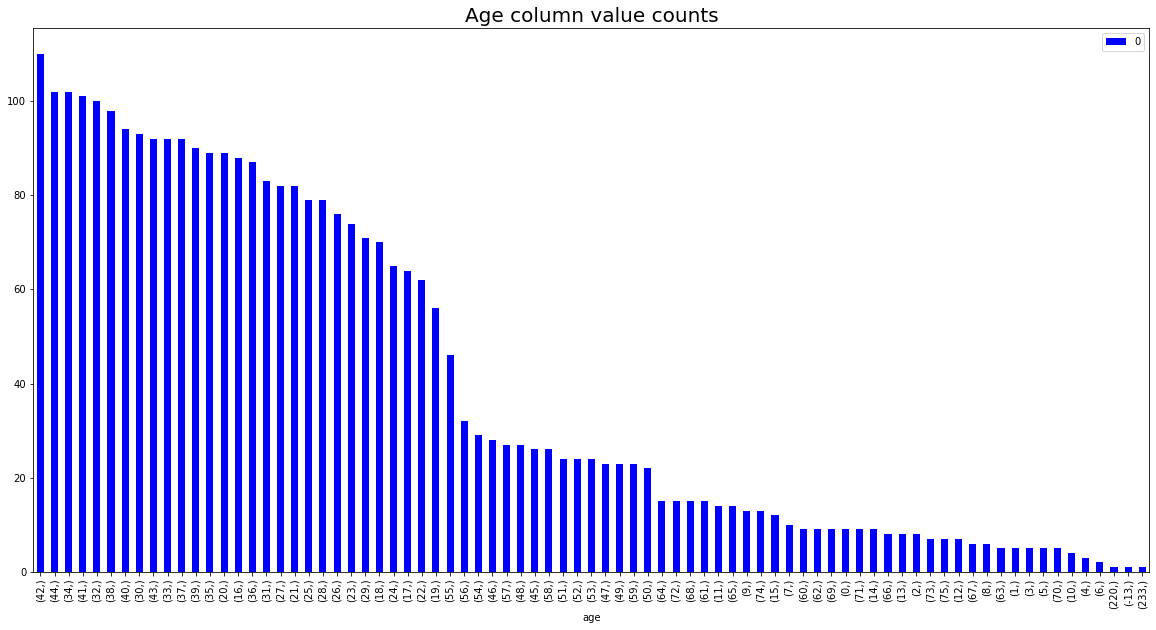

In [18]:
# Checking the value count of age columns

pd.DataFrame(df[['age']].value_counts()).plot(kind='bar',figsize=(20,10),color="blue")
plt.title("Age column value counts",fontsize = 20)
plt.savefig('./images/age_value_count.png')
plt.show()

#### Observations:
    
Age column has some negative and string values which need to be changed

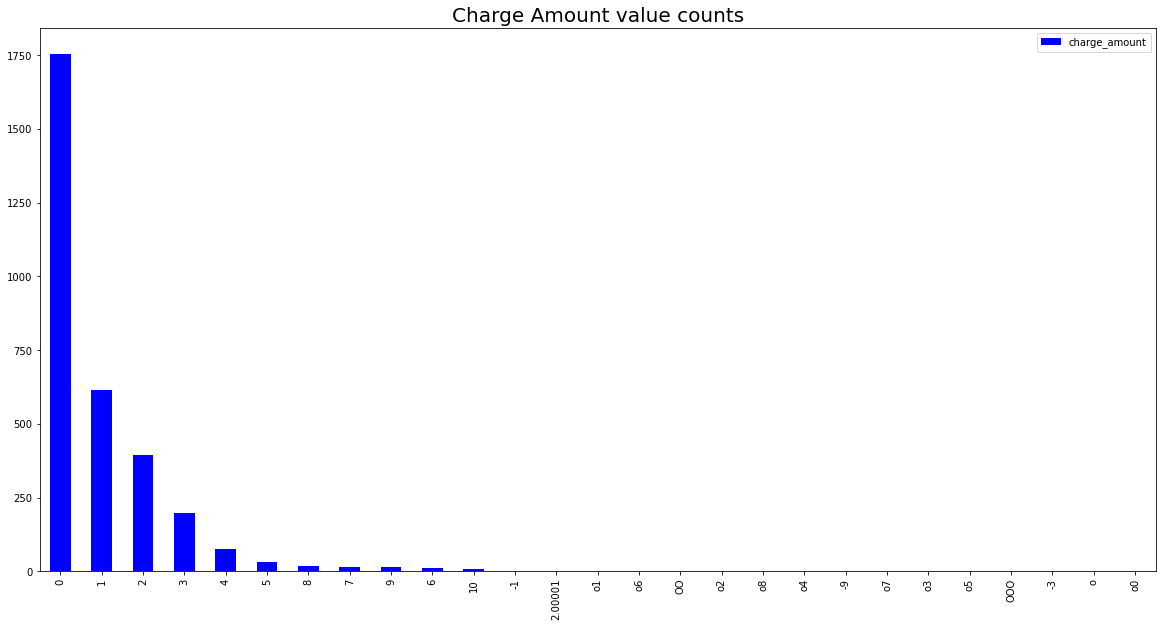

In [19]:
# Checking the value count of charge_amount

pd.DataFrame(df['charge_amount'].value_counts()).plot(kind='bar',figsize=(20,10),color="blue")
plt.title("Charge Amount value counts",fontsize = 20)
plt.savefig('./images/charge_amount_value_count.png')
plt.show()

#### Observations:

Charge amount has some string values which need to be changed

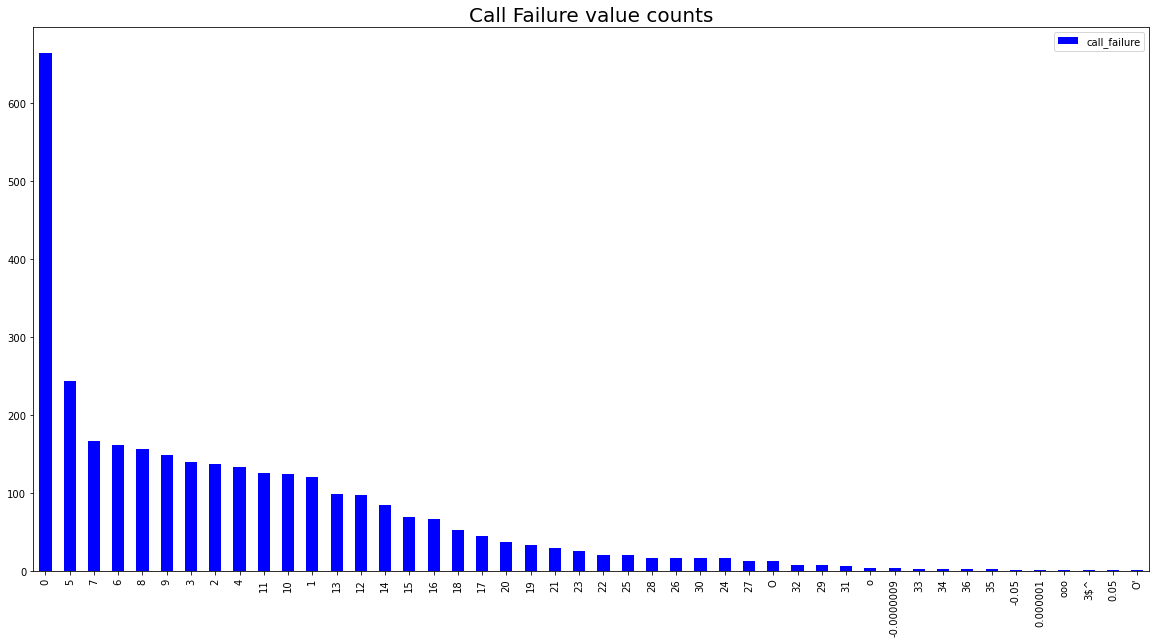

In [20]:
#Checking value count of call failures

pd.DataFrame(df['call_failure'].value_counts()).plot(kind='bar',figsize=(20,10),color="blue")
plt.title("Call Failure value counts",fontsize = 20)
plt.savefig('./images/call_failure_value_count.png')
plt.show()

#### Observations:

Call failure has some negatve values and outliers which need to be cleaned

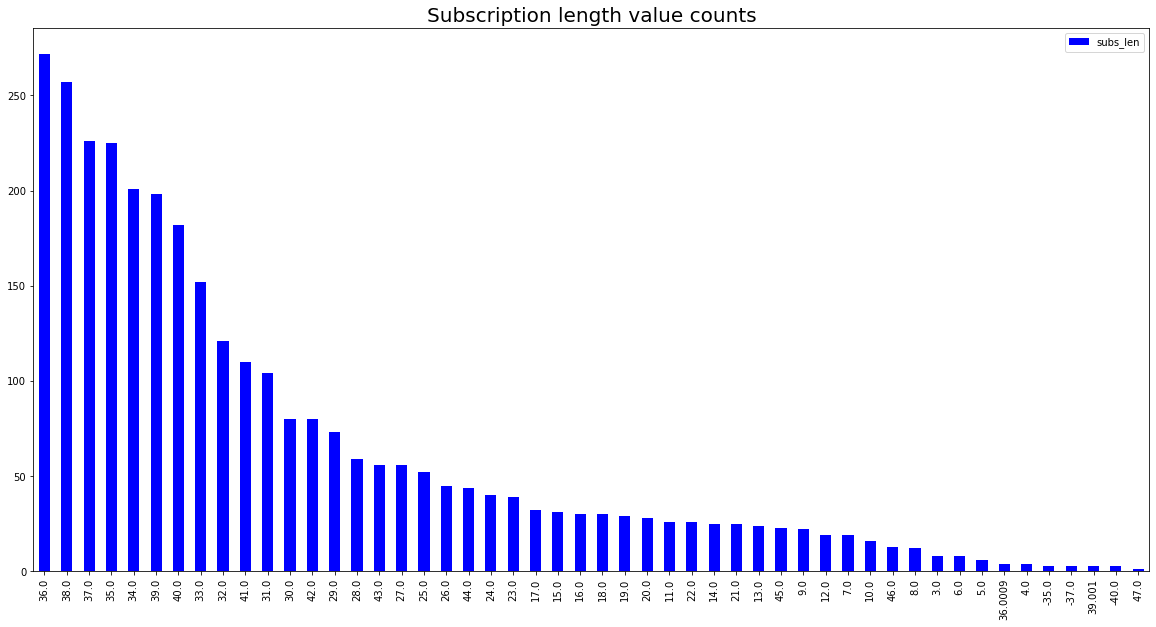

In [21]:
#Checking value count of subscription_length

pd.DataFrame(df['subs_len'].value_counts()).plot(kind='bar',figsize=(20,10),color="blue")
plt.title("Subscription length value counts",fontsize = 20)
plt.savefig('./images/subscription_length_value_count.png')
plt.show()

### Observations:  

Subscription length has some negative values which needs to cleaned

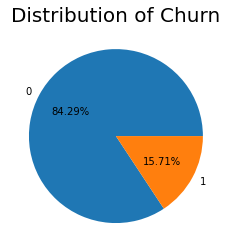

<Figure size 720x720 with 0 Axes>

In [22]:
# Churn distribution 

plt.pie(df.Churn.value_counts(), labels=df.Churn.unique(), autopct='%1.2f%%')
plt.title('Distribution of Churn', fontsize = 20)
plt.figure(figsize=(10,10))
plt.savefig('./images/churn_distribution.png')
plt.show()

#### Observations

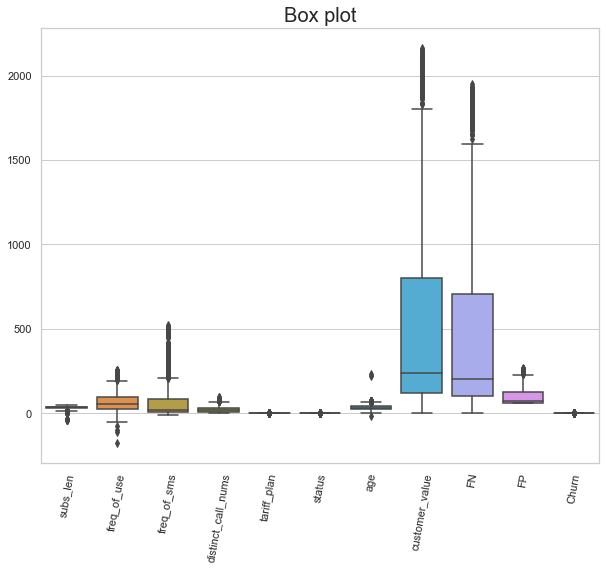

In [23]:
sn.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(10,8))
sn.boxplot(data=df)
plt.xticks(rotation=80)
plt.title("Box plot",fontsize = 20)
plt.savefig('./images/boxplot.png')
plt.show()

#### Observations:



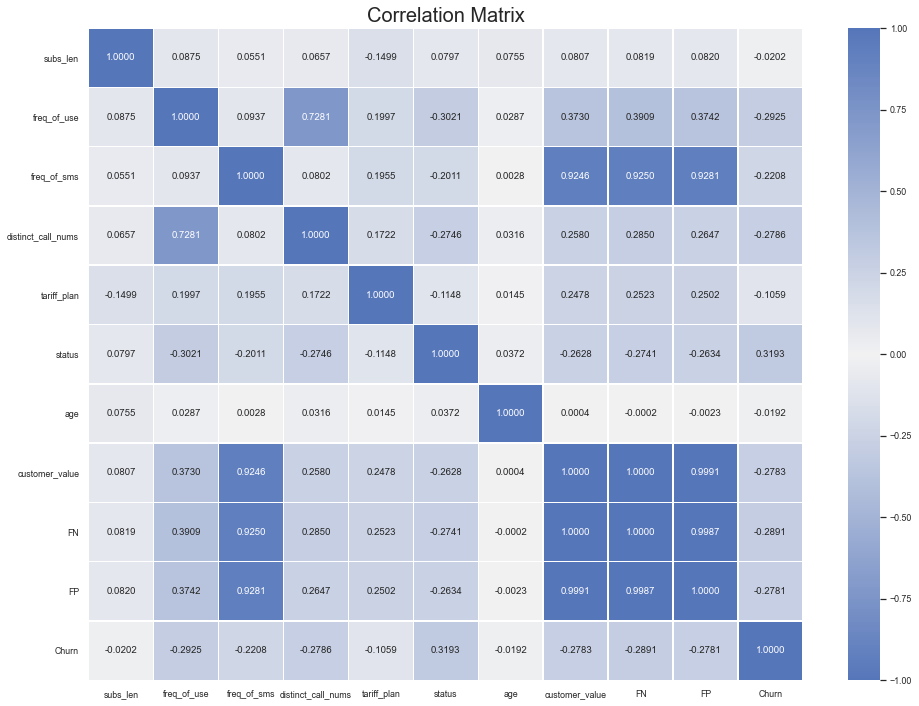

In [24]:
df_corr = df.corr()

# correlation matrix

sn.set(font_scale=0.8)
plt.figure(figsize=(16,12))
plt.title("Correlation Matrix",fontsize = 20)
sn.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sn.diverging_palette(255, 255, s=60, as_cmap=True))

plt.show()

##### Observations 1:


We observe a positive correlation between freq_of_sms and customer_value, FN and FP. 

##### Observations 2:
We observe a  positive correlation between freq_of_use and distinct_call_nums. The correlation coefficient value is 0.7281

##### Observations 3:
